## Packages

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
# Must be 1.2.2.

The scikit-learn version is 1.2.2.


In [2]:
import catboost
print('The catboost version is {}.'.format(catboost.__version__))
# Must be 1.2.5.

The catboost version is 1.2.5.


In [3]:
# General packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Feature selection
from sklearn.feature_selection import mutual_info_classif

# SMOTE
from imblearn.over_sampling import SMOTE

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier

# Tuning
from sklearn.model_selection import ParameterGrid

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Other
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

## Pre-processing

In [4]:
# Loading cross-validation folds
fold_1 = pd.read_csv("dt_train_fold_1.csv")
fold_2 = pd.read_csv("dt_train_fold_2.csv")
fold_3 = pd.read_csv("dt_train_fold_3.csv")
fold_4 = pd.read_csv("dt_train_fold_4.csv")
fold_5 = pd.read_csv("dt_train_fold_5.csv")

# Creating cross-validation training sets
train_1 = pd.concat([fold_1, fold_2, fold_3, fold_4]) # fold_5 is test
train_2 = pd.concat([fold_1, fold_2, fold_3, fold_5]) # fold_4 is test
train_3 = pd.concat([fold_1, fold_2, fold_4, fold_5]) # fold_3 is test
train_4 = pd.concat([fold_1, fold_3, fold_4, fold_5]) # fold_2 is test
train_5 = pd.concat([fold_2, fold_3, fold_4, fold_5]) # fold_1 is test

# 
X_train_1 = train_1.drop(["id", "pi"], axis = 1)
X_train_1 = pd.get_dummies(X_train_1, dtype = "float")
y_train_1 = train_1["pi"]
X_test_1 = fold_5.drop(["id", "pi"], axis = 1)
X_test_1 = pd.get_dummies(X_test_1, dtype = "float")
y_test_1 = fold_5["pi"]

#
X_train_2 = train_2.drop(["id", "pi"], axis = 1)
X_train_2 = pd.get_dummies(X_train_2, dtype = "float")
y_train_2 = train_2["pi"]
X_test_2 = fold_4.drop(["id", "pi"], axis = 1)
X_test_2 = pd.get_dummies(X_test_2, dtype = "float")
y_test_2 = fold_4["pi"]

#
X_train_3 = train_3.drop(["id", "pi"], axis = 1)
X_train_3 = pd.get_dummies(X_train_3, dtype = "float")
y_train_3 = train_3["pi"]
X_test_3 = fold_3.drop(["id", "pi"], axis = 1)
X_test_3 = pd.get_dummies(X_test_3, dtype = "float")
y_test_3 = fold_3["pi"]

#
X_train_4 = train_4.drop(["id", "pi"], axis = 1)
X_train_4 = pd.get_dummies(X_train_4, dtype = "float")
y_train_4 = train_4["pi"]
X_test_4 = fold_2.drop(["id", "pi"], axis = 1)
X_test_4 = pd.get_dummies(X_test_4, dtype = "float")
y_test_4 = fold_2["pi"]

#
X_train_5 = train_5.drop(["id", "pi"], axis = 1)
X_train_5 = pd.get_dummies(X_train_5, dtype = "float")
y_train_5 = train_5["pi"]
X_test_5 = fold_1.drop(["id", "pi"], axis = 1)
X_test_5 = pd.get_dummies(X_test_5, dtype = "float")
y_test_5 = fold_1["pi"]

# Loading hould-out test dataset
test = pd.read_csv("dt_test.csv")
X_test = test.drop(["id", "pi"], axis = 1)
X_test = pd.get_dummies(X_test, dtype = "float")
y_test = test["pi"]

# Identifying common features for training and test cv sets (and for separate test dataset)
X_all = pd.concat([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test], 
                  join = "inner")
features = X_all.columns

# Loading training dataset
train = pd.read_csv("dt_train.csv")
X_train = train.drop(["id", "pi"], axis = 1)
y_train = train["pi"]
X_train = pd.get_dummies(X_train, dtype = "float")
X_train = X_train[features]

# Calculating information gain
ig = mutual_info_classif(X_train, y_train, random_state = 22)

# Identifying features with information gain < 0.01
ig_dt = pd.DataFrame({"variable": X_train.columns, "information_gain": ig})
features_with_low_ig = ig_dt[ig_dt["information_gain"] < 0.01]["variable"].values

# Dropping these features from X_train
X_train = X_train.drop(features_with_low_ig, axis = 1)

# Reference categories
ref_categories = ["bill_bill_no", "carry_banp_carry_banp_no", "carry_cc_carry_credit_card_yes", "carry_chk_carry_check_no", 
                  "carry_csh_carry_cash_yes", "carry_dc_carry_debit_card_yes", "carry_obbp_carry_obbp_no", 
                  "carry_paypal_carry_paypal_no", "carry_prepaid_carry_prepaid_no", "in_person_in_person_yes"]

# Dropping reference categories from X_train
X_train = X_train.drop(ref_categories, axis = 1)

# Final array of features
final_features = X_train.columns

# Selecting final features for cross-validation sets and separate test set
X_train_1 = X_train_1[final_features]
X_train_2 = X_train_2[final_features]
X_train_3 = X_train_3[final_features]
X_train_4 = X_train_4[final_features]
X_train_5 = X_train_5[final_features]

#
X_test_1 = X_test_1[final_features]
X_test_2 = X_test_2[final_features]
X_test_3 = X_test_3[final_features]
X_test_4 = X_test_4[final_features]
X_test_5 = X_test_5[final_features]

#
X_test = X_test[final_features]

# Applying SMOTE to training sets
smt = SMOTE(random_state = 22)
X_train_1_smt, y_train_1_smt = smt.fit_resample(X_train_1, y_train_1)
X_train_2_smt, y_train_2_smt = smt.fit_resample(X_train_2, y_train_2)
X_train_3_smt, y_train_3_smt = smt.fit_resample(X_train_3, y_train_3)
X_train_4_smt, y_train_4_smt = smt.fit_resample(X_train_4, y_train_4)
X_train_5_smt, y_train_5_smt = smt.fit_resample(X_train_5, y_train_5)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

## RandomForestClassifier

#### 1. Without SMOTE and without hyperparameter tuning

In [5]:
# Cross-validation

rfc = RandomForestClassifier(random_state = 22)

# Iteration 1
rfc.fit(X_train_1, y_train_1)
y_pred_1 = rfc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
rfc.fit(X_train_2, y_train_2)
y_pred_2 = rfc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
rfc.fit(X_train_3, y_train_3)
y_pred_3 = rfc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
rfc.fit(X_train_4, y_train_4)
y_pred_4 = rfc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
rfc.fit(X_train_5, y_train_5)
y_pred_5 = rfc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

rfc_1_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

rfc_1_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.667072,0.458859,0.559415,0.557026,0.473568,0.667072,0.646805


In [6]:
# Test dataset

rfc = RandomForestClassifier(random_state = 22)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

rfc_1_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

rfc_1_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.6875,0.470895,0.586764,0.584793,0.483115,0.6875,0.668724


#### 2. With SMOTE, but without hyperparameter tuning

In [7]:
# Cross-validation

rfc = RandomForestClassifier(random_state = 22)

# Iteration 1
rfc.fit(X_train_1_smt, y_train_1_smt)
y_pred_1 = rfc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
rfc.fit(X_train_2_smt, y_train_2_smt)
y_pred_2 = rfc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
rfc.fit(X_train_3_smt, y_train_3_smt)
y_pred_3 = rfc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
rfc.fit(X_train_4_smt, y_train_4_smt)
y_pred_4 = rfc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
rfc.fit(X_train_5_smt, y_train_5_smt)
y_pred_5 = rfc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

rfc_2_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

rfc_2_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.660237,0.507461,0.557716,0.557245,0.51078,0.660237,0.652683


In [8]:
# Test dataset

rfc = RandomForestClassifier(random_state = 22)

rfc.fit(X_train_smt, y_train_smt)
y_pred = rfc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

rfc_2_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

rfc_2_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.670064,0.506741,0.571159,0.570882,0.505253,0.670064,0.664113


#### 3. Without SMOTE, but with hyperparameter tuning

In [9]:
# Cross-validation

param_grid = {"n_estimators": [100, 200, 300], 
              "max_depth": [5, 10, 20, None],
              "max_features": ["sqrt", "log2", None],
              "class_weight": ["balanced", None]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 72, 1):
    
    rfc = RandomForestClassifier(random_state = 22)
    rfc.set_params(**grid[j])

    # Iteration 1
    rfc.fit(X_train_1, y_train_1)
    y_pred_1 = rfc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    rfc.fit(X_train_2, y_train_2)
    y_pred_2 = rfc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    rfc.fit(X_train_3, y_train_3)
    y_pred_3 = rfc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    rfc.fit(X_train_4, y_train_4)
    y_pred_4 = rfc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    rfc.fit(X_train_5, y_train_5)
    y_pred_5 = rfc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
rfc_3_validation = pd.concat([param_list, scores_list], axis = 1)

In [10]:
# Save results to avoid running the script again
#rfc_3_validation.to_csv("rfc_3_validation_scores.csv")

# Best model according to macro F1-score
rfc_3_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,n_estimators,max_features,max_depth,class_weight,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
13,200,log2,10.0,balanced,0.635307,0.556885,0.541923,0.539469,0.508797,0.635307,0.640654


In [11]:
# Test dataset

rfc = RandomForestClassifier(n_estimators = 200, 
                             max_features = "log2", 
                             max_depth = 10, 
                             class_weight = "balanced", 
                             random_state = 22)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

rfc_3_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

rfc_3_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.638948,0.565479,0.548709,0.545834,0.507543,0.638948,0.647941


#### 4. With SMOTE and with hyperparameter tuning

In [12]:
# Cross-validation

param_grid = {"n_estimators": [100, 200, 300], 
              "max_depth": [5, 10, 20, None],
              "max_features": ["sqrt", "log2", None],
              "class_weight": ["balanced", None]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 72, 1):
    
    rfc = RandomForestClassifier(random_state = 22)
    rfc.set_params(**grid[j])

    # Iteration 1
    rfc.fit(X_train_1_smt, y_train_1_smt)
    y_pred_1 = rfc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    rfc.fit(X_train_2_smt, y_train_2_smt)
    y_pred_2 = rfc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    rfc.fit(X_train_3_smt, y_train_3_smt)
    y_pred_3 = rfc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    rfc.fit(X_train_4_smt, y_train_4_smt)
    y_pred_4 = rfc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    rfc.fit(X_train_5_smt, y_train_5_smt)
    y_pred_5 = rfc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
rfc_4_validation = pd.concat([param_list, scores_list], axis = 1)

In [13]:
# Save results to avoid running the script again
#rfc_4_validation.to_csv("rfc_4_validation_scores.csv")

# Best model according to macro F1-score
rfc_4_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,n_estimators,max_features,max_depth,class_weight,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
20,300,sqrt,20.0,balanced,0.665983,0.516572,0.566032,0.565583,0.516841,0.665983,0.658784


In [14]:
# Test dataset

rfc = RandomForestClassifier(n_estimators = 300, 
                             max_features = "sqrt", 
                             max_depth = 20, 
                             class_weight = "balanced", 
                             random_state = 22)

rfc.fit(X_train_smt, y_train_smt)
y_pred = rfc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

rfc_4_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

rfc_4_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.682135,0.529352,0.588521,0.588192,0.524674,0.682135,0.678005


## GradientBoostingClassifier

#### 1. Without SMOTE and without hyperparameter tuning

In [15]:
# Cross-validation

gbc = GradientBoostingClassifier(random_state = 22)

# Iteration 1
gbc.fit(X_train_1, y_train_1)
y_pred_1 = gbc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
gbc.fit(X_train_2, y_train_2)
y_pred_2 = gbc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
gbc.fit(X_train_3, y_train_3)
y_pred_3 = gbc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
gbc.fit(X_train_4, y_train_4)
y_pred_4 = gbc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
gbc.fit(X_train_5, y_train_5)
y_pred_5 = gbc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

gbc_1_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

gbc_1_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.686728,0.504563,0.587771,0.586102,0.520916,0.686728,0.671998


In [16]:
# Test dataset

gbc = GradientBoostingClassifier(random_state = 22)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

gbc_1_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

gbc_1_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.694742,0.511339,0.598839,0.597328,0.523486,0.694742,0.681924


#### 2. With SMOTE, but without hyperparameter tuning

In [17]:
# Cross-validation

gbc = GradientBoostingClassifier(random_state = 22)

# Iteration 1
gbc.fit(X_train_1_smt, y_train_1_smt)
y_pred_1 = gbc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
gbc.fit(X_train_2_smt, y_train_2_smt)
y_pred_2 = gbc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
gbc.fit(X_train_3_smt, y_train_3_smt)
y_pred_3 = gbc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
gbc.fit(X_train_4_smt, y_train_4_smt)
y_pred_4 = gbc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
gbc.fit(X_train_5_smt, y_train_5_smt)
y_pred_5 = gbc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

gbc_2_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

gbc_2_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.661473,0.556762,0.56747,0.56669,0.53133,0.661473,0.662505


In [18]:
# Test dataset

gbc = GradientBoostingClassifier(random_state = 22)

gbc.fit(X_train_smt, y_train_smt)
y_pred = gbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

gbc_2_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

gbc_2_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.675697,0.571119,0.587645,0.586555,0.540743,0.675697,0.680098


#### 3. Without SMOTE, but with hyperparameter tuning

In [19]:
# Cross-validation

param_grid = {"learning_rate": [0.05, 0.10, 0.15],
              "n_estimators": [100, 200], 
              "max_depth": [3, 5, 7]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 18, 1):
    
    gbc = GradientBoostingClassifier(random_state = 22)
    gbc.set_params(**grid[j])

    # Iteration 1
    gbc.fit(X_train_1, y_train_1)
    y_pred_1 = gbc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    gbc.fit(X_train_2, y_train_2)
    y_pred_2 = gbc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    gbc.fit(X_train_3, y_train_3)
    y_pred_3 = gbc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    gbc.fit(X_train_4, y_train_4)
    y_pred_4 = gbc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    gbc.fit(X_train_5, y_train_5)
    y_pred_5 = gbc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
gbc_3_validation = pd.concat([param_list, scores_list], axis = 1)

In [22]:
# Save results to avoid running the script again
#gbc_3_validation.to_csv("gbc_3_validation_scores.csv")

# Best model according to macro F1-score
gbc_3_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,n_estimators,max_depth,learning_rate,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
7,200,3,0.1,0.686085,0.513567,0.587755,0.586506,0.528534,0.686085,0.673692


In [28]:
# Test dataset

gbc = GradientBoostingClassifier(n_estimators = 200,  
                                 max_depth = 3, 
                                 learning_rate = 0.1, 
                                 random_state = 22)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

gbc_3_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

gbc_3_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.696888,0.520336,0.602267,0.601267,0.533719,0.696888,0.686717


#### 4. With SMOTE and with hyperparameter tuning

In [23]:
# Cross-validation

param_grid = {"learning_rate": [0.05, 0.10, 0.15],
              "n_estimators": [100, 200], 
              "max_depth": [3, 5, 7]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 18, 1):
    
    gbc = GradientBoostingClassifier(random_state = 22)
    gbc.set_params(**grid[j])

    # Iteration 1
    gbc.fit(X_train_1_smt, y_train_1_smt)
    y_pred_1 = gbc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    gbc.fit(X_train_2_smt, y_train_2_smt)
    y_pred_2 = gbc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    gbc.fit(X_train_3_smt, y_train_3_smt)
    y_pred_3 = gbc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    gbc.fit(X_train_4_smt, y_train_4_smt)
    y_pred_4 = gbc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    gbc.fit(X_train_5_smt, y_train_5_smt)
    y_pred_5 = gbc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
gbc_4_validation = pd.concat([param_list, scores_list], axis = 1)

In [25]:
# Save results to avoid running the script again
#gbc_4_validation.to_csv("gbc_4_validation_scores.csv")

# Best model according to macro F1-score
gbc_4_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,n_estimators,max_depth,learning_rate,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
1,200,3,0.05,0.66366,0.56224,0.570399,0.569607,0.536091,0.66366,0.66473


In [29]:
# Test dataset

gbc = GradientBoostingClassifier(n_estimators = 200,  
                                 max_depth = 3, 
                                 learning_rate = 0.05, 
                                 random_state = 22)

gbc.fit(X_train_smt, y_train_smt)
y_pred = gbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

gbc_4_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

gbc_4_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.67382,0.573974,0.585953,0.584697,0.54008,0.67382,0.678563


## CatBoost

#### 1. Without SMOTE and without hyperparameter tuning

In [30]:
# Cross-validation

cbc = CatBoostClassifier(random_state = 22, silent = True)

# Iteration 1
cbc.fit(X_train_1, y_train_1)
y_pred_1 = cbc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
cbc.fit(X_train_2, y_train_2)
y_pred_2 = cbc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
cbc.fit(X_train_3, y_train_3)
y_pred_3 = cbc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
cbc.fit(X_train_4, y_train_4)
y_pred_4 = cbc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
cbc.fit(X_train_5, y_train_5)
y_pred_5 = cbc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

cbc_1_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

cbc_1_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.678817,0.504116,0.577904,0.576684,0.518215,0.678817,0.665858


In [31]:
# Test dataset

cbc = CatBoostClassifier(random_state = 22, silent = True)

cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

cbc_1_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

cbc_1_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.698766,0.51509,0.60434,0.603563,0.532666,0.698766,0.68801


#### 2. With SMOTE, but without hyperparameter tuning

In [32]:
# Cross-validation

cbc = CatBoostClassifier(random_state = 22, silent = True)

# Iteration 1
cbc.fit(X_train_1_smt, y_train_1_smt)
y_pred_1 = cbc.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
cbc.fit(X_train_2_smt, y_train_2_smt)
y_pred_2 = cbc.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
cbc.fit(X_train_3_smt, y_train_3_smt)
y_pred_3 = cbc.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
cbc.fit(X_train_4_smt, y_train_4_smt)
y_pred_4 = cbc.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
cbc.fit(X_train_5_smt, y_train_5_smt)
y_pred_5 = cbc.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

cbc_2_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

cbc_2_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.671266,0.529249,0.572554,0.572202,0.533554,0.671266,0.665348


In [33]:
# Test dataset

cbc = CatBoostClassifier(random_state = 22, silent = True)

cbc.fit(X_train_smt, y_train_smt)
y_pred = cbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

cbc_2_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

cbc_2_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.684281,0.52687,0.589825,0.589638,0.529971,0.684281,0.679434


#### 3. Without SMOTE, but with hyperparameter tuning

In [5]:
# Cross-validation

param_grid = {"random_strength": [1, 3, 5], 
              "depth": [4, 5, 6], 
              "iterations": [500, 1000, 1500]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 27, 1):
    
    cbc = CatBoostClassifier(random_state = 22, silent = True)
    cbc.set_params(**grid[j])

    # Iteration 1
    cbc.fit(X_train_1, y_train_1)
    y_pred_1 = cbc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    cbc.fit(X_train_2, y_train_2)
    y_pred_2 = cbc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    cbc.fit(X_train_3, y_train_3)
    y_pred_3 = cbc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    cbc.fit(X_train_4, y_train_4)
    y_pred_4 = cbc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    cbc.fit(X_train_5, y_train_5)
    y_pred_5 = cbc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
cbc_3_validation = pd.concat([param_list, scores_list], axis = 1)

In [6]:
# Save results to avoid running the script again
#cbc_3_validation.to_csv("cbc_3_validation_scores.csv")

# Best model according to macro F1-score
cbc_3_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,random_strength,iterations,depth,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
7,3,1500,4,0.689353,0.517498,0.591752,0.590417,0.534019,0.689353,0.676521


In [7]:
# Test dataset

cbc = CatBoostClassifier(random_strength = 3,  
                         depth = 4,
                         iterations = 1500, 
                         random_state = 22, 
                         silent = True)

cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

cbc_3_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

cbc_3_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.699303,0.51557,0.60524,0.604338,0.527874,0.699303,0.687854


#### 4. With SMOTE and with hyperparameter tuning

In [8]:
# Cross-validation

param_grid = {"random_strength": [1, 3, 5], 
              "depth": [4, 5, 6], 
              "iterations": [500, 1000, 1500]}

grid = ParameterGrid(param_grid)
param_list = []
scores_list = []

for j in range(0, 27, 1):
    
    cbc = CatBoostClassifier(random_state = 22, silent = True)
    cbc.set_params(**grid[j])

    # Iteration 1
    cbc.fit(X_train_1_smt, y_train_1_smt)
    y_pred_1 = cbc.predict(X_test_1)
    # Metrics
    as_1 = accuracy_score(y_test_1, y_pred_1)
    bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
    mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
    cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
    f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
    f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
    f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

    # Iteration 2
    cbc.fit(X_train_2_smt, y_train_2_smt)
    y_pred_2 = cbc.predict(X_test_2)
    # Metrics
    as_2 = accuracy_score(y_test_2, y_pred_2)
    bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
    mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
    cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
    f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
    f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
    f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

    # Iteration 3
    cbc.fit(X_train_3_smt, y_train_3_smt)
    y_pred_3 = cbc.predict(X_test_3)
    # Metrics
    as_3 = accuracy_score(y_test_3, y_pred_3)
    bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
    mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
    cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
    f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
    f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
    f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

    # Iteration 4
    cbc.fit(X_train_4_smt, y_train_4_smt)
    y_pred_4 = cbc.predict(X_test_4)
    # Metrics
    as_4 = accuracy_score(y_test_4, y_pred_4)
    bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
    mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
    cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
    f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
    f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
    f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

    # Iteration 5
    cbc.fit(X_train_5_smt, y_train_5_smt)
    y_pred_5 = cbc.predict(X_test_5)
    # Metrics
    as_5 = accuracy_score(y_test_5, y_pred_5)
    bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
    mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
    cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
    f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
    f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
    f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

    # Averaging scores
    as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
    bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
    mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
    cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
    f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
    f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
    f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5
    
    #
    param_list.append(grid[j])
    scores_list.append({"as_avg": as_avg, 
                        "bas_avg": bas_avg, 
                        "mcc_avg": mcc_avg, 
                        "cks_avg": cks_avg, 
                        "f1_macro_avg": f1_macro_avg, 
                        "f1_micro_avg": f1_micro_avg, 
                        "f1_weighted_avg": f1_weighted_avg})
    
param_list = pd.DataFrame(param_list)
scores_list = pd.DataFrame(scores_list)
cbc_4_validation = pd.concat([param_list, scores_list], axis = 1)

In [9]:
# Save results to avoid running the script again
#cbc_4_validation.to_csv("cbc_4_validation_scores.csv")

# Best model according to macro F1-score
cbc_4_validation.sort_values("f1_macro_avg", ascending = False).head(1)

,random_strength,iterations,depth,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
3,1,1000,4,0.670684,0.543848,0.573862,0.573508,0.53942,0.670684,0.66672


In [10]:
# Test dataset

cbc = CatBoostClassifier(random_strength = 1,  
                         depth = 4, 
                         iterations = 1000, 
                         random_state = 22, 
                         silent = True)

cbc.fit(X_train_smt, y_train_smt)
y_pred = cbc.predict(X_test)
as_test = accuracy_score(y_test, y_pred)
bas_test = balanced_accuracy_score(y_test, y_pred)
mcc_test = matthews_corrcoef(y_test, y_pred)
cks_test = cohen_kappa_score(y_test, y_pred)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
f1_micro_test = f1_score(y_test, y_pred, average = "micro")
f1_weighted_test = f1_score(y_test, y_pred, average = "weighted")

cbc_4_test = pd.DataFrame({"as": [as_test], 
                           "bas": [bas_test], 
                           "mcc": [mcc_test], 
                           "cks": [cks_test], 
                           "f1_macro": [f1_macro_test], 
                           "f1_micro": [f1_micro_test], 
                           "f1_weighted": [f1_weighted_test]})

cbc_4_test

,as,bas,mcc,cks,f1_macro,f1_micro,f1_weighted
0,0.686427,0.549401,0.595105,0.594892,0.539063,0.686427,0.684494


## Dummy classifier

In [11]:
# Cross-validation

dummy = DummyClassifier(random_state = 22, strategy = "stratified")

# Iteration 1
dummy.fit(X_train_1, y_train_1)
y_pred_1 = dummy.predict(X_test_1)
# Metrics
as_1 = accuracy_score(y_test_1, y_pred_1)
bas_1 = balanced_accuracy_score(y_test_1, y_pred_1)
mcc_1 = matthews_corrcoef(y_test_1, y_pred_1)
cks_1 = cohen_kappa_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average = "macro")
f1_micro_1 = f1_score(y_test_1, y_pred_1, average = "micro")
f1_weighted_1 = f1_score(y_test_1, y_pred_1, average = "weighted")

# Iteration 2
dummy.fit(X_train_2, y_train_2)
y_pred_2 = dummy.predict(X_test_2)
# Metrics
as_2 = accuracy_score(y_test_2, y_pred_2)
bas_2 = balanced_accuracy_score(y_test_2, y_pred_2)
mcc_2 = matthews_corrcoef(y_test_2, y_pred_2)
cks_2 = cohen_kappa_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average = "macro")
f1_micro_2 = f1_score(y_test_2, y_pred_2, average = "micro")
f1_weighted_2 = f1_score(y_test_2, y_pred_2, average = "weighted")

# Iteration 3
dummy.fit(X_train_3, y_train_3)
y_pred_3 = dummy.predict(X_test_3)
# Metrics
as_3 = accuracy_score(y_test_3, y_pred_3)
bas_3 = balanced_accuracy_score(y_test_3, y_pred_3)
mcc_3 = matthews_corrcoef(y_test_3, y_pred_3)
cks_3 = cohen_kappa_score(y_test_3, y_pred_3)
f1_macro_3 = f1_score(y_test_3, y_pred_3, average = "macro")
f1_micro_3 = f1_score(y_test_3, y_pred_3, average = "micro")
f1_weighted_3 = f1_score(y_test_3, y_pred_3, average = "weighted")

# Iteration 4
dummy.fit(X_train_4, y_train_4)
y_pred_4 = dummy.predict(X_test_4)
# Metrics
as_4 = accuracy_score(y_test_4, y_pred_4)
bas_4 = balanced_accuracy_score(y_test_4, y_pred_4)
mcc_4 = matthews_corrcoef(y_test_4, y_pred_4)
cks_4 = cohen_kappa_score(y_test_4, y_pred_4)
f1_macro_4 = f1_score(y_test_4, y_pred_4, average = "macro")
f1_micro_4 = f1_score(y_test_4, y_pred_4, average = "micro")
f1_weighted_4 = f1_score(y_test_4, y_pred_4, average = "weighted")

# Iteration 5
dummy.fit(X_train_5, y_train_5)
y_pred_5 = dummy.predict(X_test_5)
# Metrics
as_5 = accuracy_score(y_test_5, y_pred_5)
bas_5 = balanced_accuracy_score(y_test_5, y_pred_5)
mcc_5 = matthews_corrcoef(y_test_5, y_pred_5)
cks_5 = cohen_kappa_score(y_test_5, y_pred_5)
f1_macro_5 = f1_score(y_test_5, y_pred_5, average = "macro")
f1_micro_5 = f1_score(y_test_5, y_pred_5, average = "micro")
f1_weighted_5 = f1_score(y_test_5, y_pred_5, average = "weighted")

# Averaging scores
as_avg = (as_1 + as_2 + as_3 + as_4 + as_5)/5
bas_avg = (bas_1 + bas_2 + bas_3 + bas_4 + bas_5)/5
mcc_avg = (mcc_1 + mcc_2 + mcc_3 + mcc_4 + mcc_5)/5
cks_avg = (cks_1 + cks_2 + cks_3 + cks_4 + cks_5)/5
f1_macro_avg = (f1_macro_1 + f1_macro_2 + f1_macro_3 + f1_macro_4 + f1_macro_5)/5
f1_micro_avg = (f1_micro_1 + f1_micro_2 + f1_micro_3 + f1_micro_4 + f1_micro_5)/5
f1_weighted_avg = (f1_weighted_1 + f1_weighted_2 + f1_weighted_3 + f1_weighted_4 + f1_weighted_5)/5

dummy_validation = pd.DataFrame({"as_avg": [as_avg], 
                                  "bas_avg": [bas_avg], 
                                  "mcc_avg": [mcc_avg], 
                                  "cks_avg": [cks_avg], 
                                  "f1_macro_avg": [f1_macro_avg], 
                                  "f1_micro_avg": [f1_micro_avg], 
                                  "f1_weighted_avg": [f1_weighted_avg]})

dummy_validation

,as_avg,bas_avg,mcc_avg,cks_avg,f1_macro_avg,f1_micro_avg,f1_weighted_avg
0,0.221722,0.125684,-0.000953,-0.000948,0.125472,0.221722,0.223762


In [10]:
dummy = DummyClassifier(random_state = 22, strategy = "stratified")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
f1_macro_test = f1_score(y_test, y_pred, average = "macro")
as_test = accuracy_score(y_test, y_pred)
print(f1_macro_test, as_test)

0.12970770194578232 0.2180793991416309


## Confusion matrices

#### Random forest

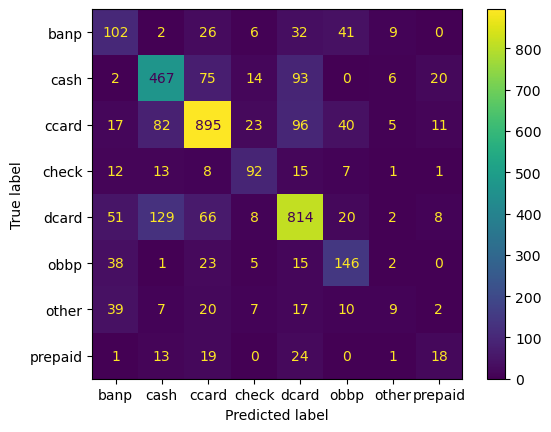

In [11]:
# Best model

rfc = RandomForestClassifier(n_estimators = 300, 
                             max_features = "sqrt", 
                             max_depth = 20, 
                             class_weight = "balanced", 
                             random_state = 22)
rfc.fit(X_train_smt, y_train_smt)
y_pred = rfc.predict(X_test)

cfm = confusion_matrix(y_test, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = rfc.classes_)
disp.plot()
plt.show()

#### Gradient boosting

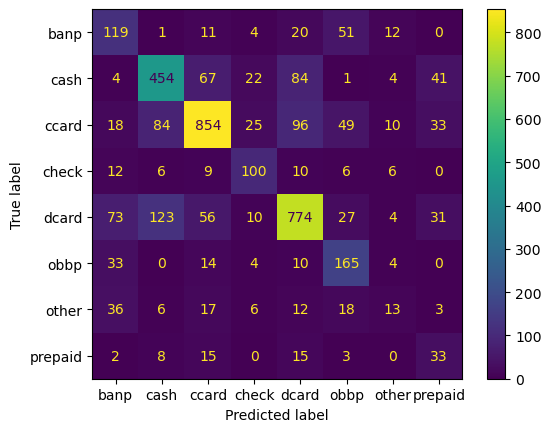

In [12]:
# Best model

gbc = GradientBoostingClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.05, random_state = 22)
gbc.fit(X_train_smt, y_train_smt)
y_pred = gbc.predict(X_test)

cfm = confusion_matrix(y_test, y_pred, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = gbc.classes_)
disp.plot()
plt.show()

#### CatBoost

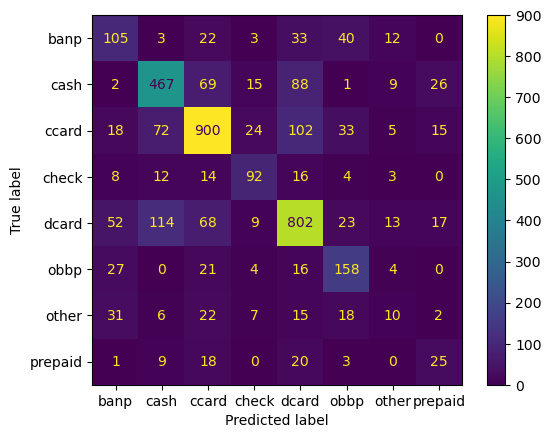

In [13]:
# Best model

cb = CatBoostClassifier(random_strength = 1, 
                        depth = 4,
                        iterations = 1000,
                        random_seed = 22, silent = True)
cb.fit(X_train_smt, y_train_smt)
y_pred = cb.predict(X_test)

cfm = confusion_matrix(y_test, y_pred, labels = cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = cb.classes_)
disp.plot()
plt.show()